## Description de Problème

#### La santé est un aspect essentiel de la vie humaine, qui joue un rôle clé dans le développement et le bien-être de chaque individu. Malheureusement, des facteurs tels que la pauvreté, l'accès limité aux soins de santé et les maladies infectieuses continuent de menacer la santé de millions de personnes à travers le monde. Pour étudier ce problème, on peut recours à la technologie de l'apprentissage automatique pour prédire les incidents futurs et aider à prévenir les maladies, en particulier dans les pays en développement.
#### Dans ce projet, nous avons accès à un ensemble de données provenant du dépôt de données de l'Observatoire mondial de la santé (OMS) de l'Organisation mondiale de la santé qui fournit des informations détaillées sur les facteurs de santé, les facteurs économiques et les facteurs sociaux de 193 pays. 
#### En utilisant ces données, nous cherchons à construire un algorithme d'apprentissage automatique capable de prédire les incidents futurs et d'aider à concevoir des politiques publiques efficaces pour améliorer la santé des populations à travers le monde.

## Identification des variables de sortie et des entrées

#### Le dataset que nous utilisons contient 22 colonnes et 2938 lignes de données sur les facteurs de santé, économiques et sociaux pour 193 pays entre 2000 et 2015. Pour construire un modèle de prédiction, nous devons identifier la variable de sortie, c'est-à-dire la variable à prédire, ainsi que les variables d'entrée, qui sont les variables utilisées pour prédire la variable de sortie.

#### Dans ce cas, notre variable de sortie est l'espérance de vie, qui est l'indicateur le plus couramment utilisé pour mesurer l'état de santé d'une population.

#### Les variables d'entrée incluent les facteurs de santé tels que la vaccination, la mortalité infantile et la prévalence des maladies, ainsi que les facteurs économiques et sociaux tels que le PIB, l'alphabétisation et l'accès à l'eau potable.

#### En utilisant ces variables, nous pouvons construire un modèle de prédiction pour estimer l'espérance de vie dans différents pays en fonction de ces facteurs.

## importer les bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

## Lire le jeu des données

In [14]:
esperance = pd.read_csv('Life Expectancy Data.csv')
esperance.head().T

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011
Status,Developing,Developing,Developing,Developing,Developing
Life expectancy,65.0,59.9,59.9,59.5,59.2
Adult Mortality,263.0,271.0,268.0,272.0,275.0
infant deaths,62,64,66,69,71
Alcohol,0.01,0.01,0.01,0.01,0.01
percentage expenditure,71.279624,73.523582,73.219243,78.184215,7.097109
Hepatitis B,65.0,62.0,64.0,67.0,68.0
Measles,1154,492,430,2787,3013


In [6]:
esperance.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [19]:
esperance.shape

(2742, 22)

In [3]:
esperance.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# EDA

In [8]:
df = pd.read_csv('Life Expectancy Data.csv')

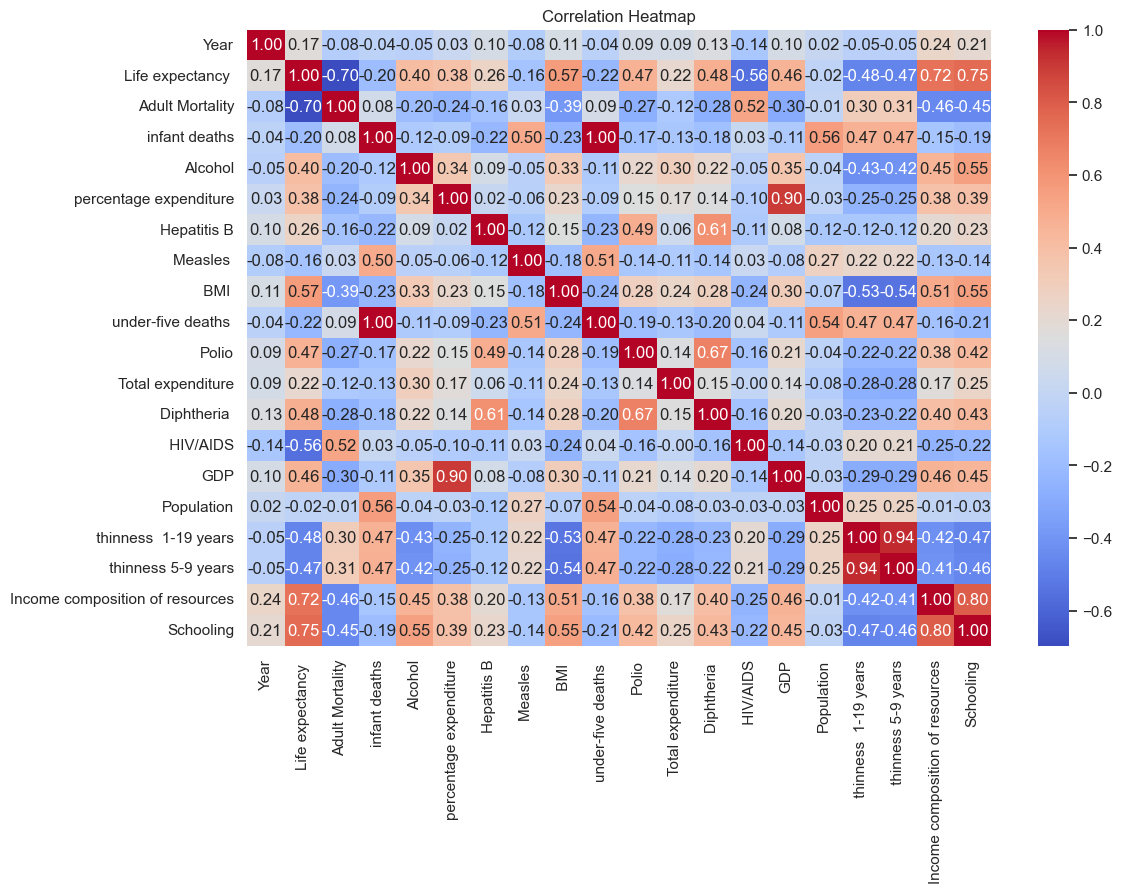

In [9]:
# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

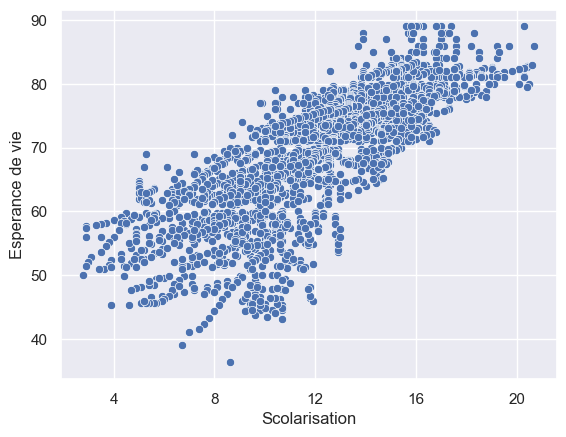

In [18]:
sns.set()
esperance = esperance[esperance['Schooling'] != 0] # supprimer les instances où la scolarisation est égale à 0
esperance = esperance.dropna(subset=['Schooling']) # supprimer les instances où la scolarisation est nulle
esperance = esperance.dropna(subset=['Life expectancy ']) # supprimer les instances où l'esperance de vie est nulle
ax = sns.scatterplot(x="Schooling", y="Life expectancy ", data=esperance)
ax.set(xlabel='Scolarisation', ylabel="Esperance de vie")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

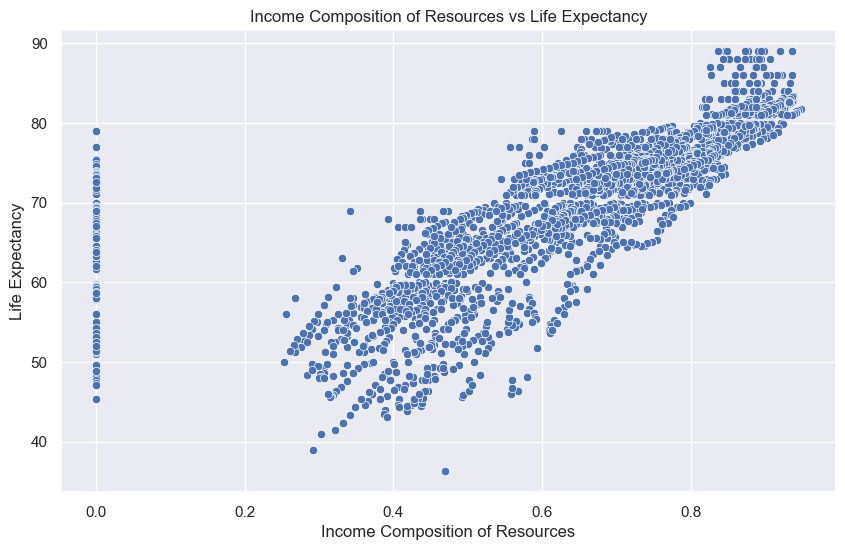

In [13]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income composition of resources', y='Life expectancy ', data=df)
plt.title('Income Composition of Resources vs Life Expectancy')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.show()

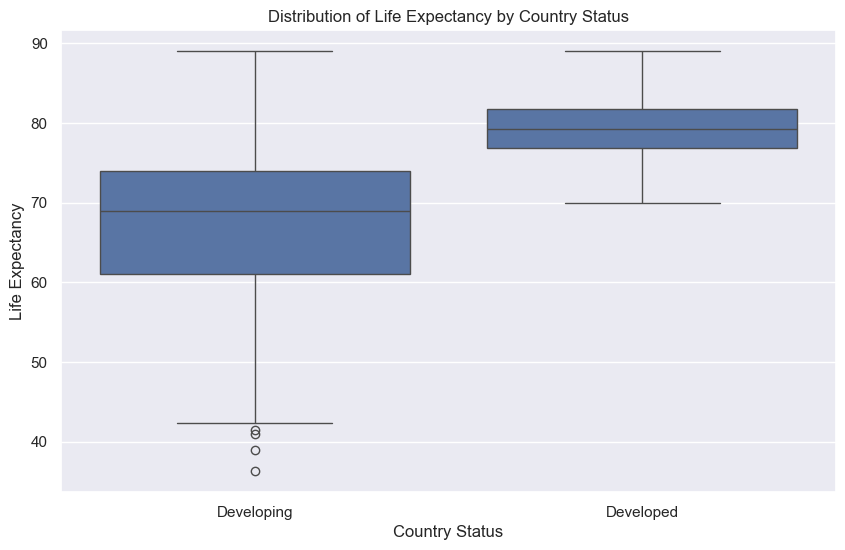

In [10]:
# 2. Distribution of Life Expectancy by Country Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=df)
plt.title('Distribution of Life Expectancy by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')
plt.show()

In [24]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

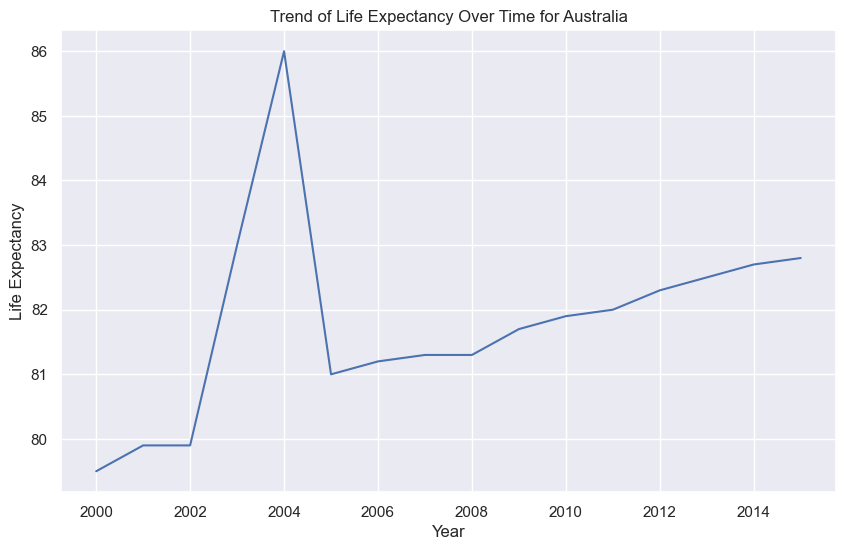

In [34]:
# 3. Trend of Life Expectancy Over Time
selected_country = 'Australia'  # Change to any country you want to visualize
country_data = df[df['Country'] == selected_country]
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life expectancy ', data=country_data)
plt.title(f'Trend of Life Expectancy Over Time for {selected_country}')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.savefig('life expectancy over time.png')
plt.show()

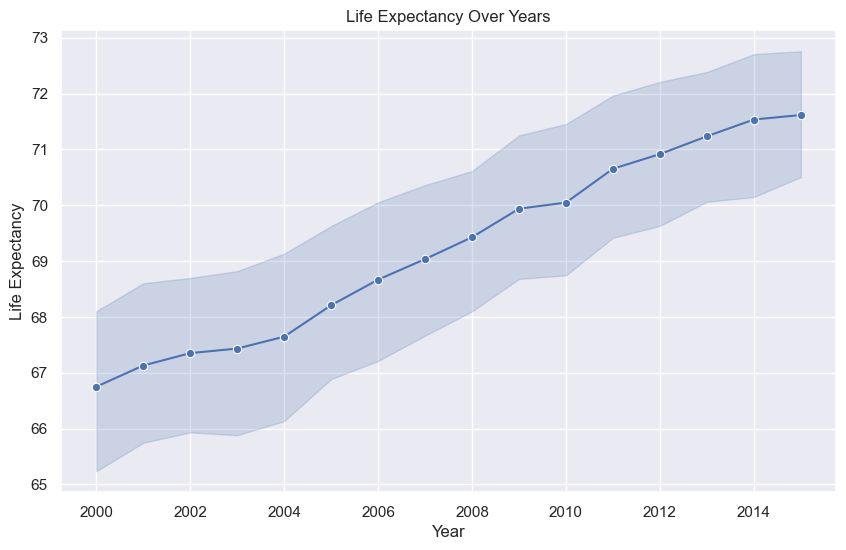

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the life expectancy data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life expectancy ', data=df, marker='o')
plt.title('Life Expectancy Over Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

In [38]:
sns.lineplot('year', 'life_expectancy', data=df, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

TypeError: lineplot() got multiple values for argument 'data'

In [35]:
yead_df = df[df['Year'] == 2005]

In [36]:
yead_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
10,Afghanistan,2005,Developing,57.3,291.0,85,0.02,1.388648,66.0,1296,...,58.0,8.70,58.0,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9
26,Albania,2005,Developing,73.5,15.0,1,5.16,26.993121,98.0,6,...,97.0,6.12,98.0,0.1,279.142931,311487.0,1.8,1.8,0.685,10.8
42,Algeria,2005,Developing,72.9,136.0,19,0.50,2.548923,83.0,2302,...,88.0,3.24,88.0,0.1,31.122378,33288437.0,6.1,6.0,0.680,12.0
58,Angola,2005,Developing,47.4,382.0,92,5.04,98.191451,NaN,258,...,39.0,4.10,38.0,2.6,1443.991929,19552542.0,1.0,9.9,0.426,6.8
74,Antigua and Barbuda,2005,Developing,74.6,147.0,0,8.15,1455.608186,99.0,0,...,98.0,4.41,99.0,0.1,11371.938950,NaN,3.5,3.4,0.000,0.0


In [30]:
status_df = df[df['Status'] == 'Developed']

In [31]:
status_df.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Germany', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'], dtype=object)

In [32]:
Morocco_df = df[df["Country"] == 'Australia']

In [33]:
Morocco_df.T

,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
Country,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia
Year,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Status,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed,Developed
Life expectancy,82.8,82.7,82.5,82.3,82.0,81.9,81.7,81.3,81.3,81.2,81.0,86.0,83.0,79.9,79.9,79.5
Adult Mortality,59.0,6.0,61.0,61.0,63.0,64.0,66.0,66.0,66.0,66.0,67.0,69.0,71.0,73.0,75.0,78.0
infant deaths,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Alcohol,NaN,9.71,9.87,10.03,10.3,10.52,10.62,10.76,10.56,10.31,10.3,9.84,9.97,9.84,9.53,10.17
percentage expenditure,0.0,10769.36305,11734.85381,11714.99858,10986.26527,8875.786493,7172.275229,8547.292357,872.598609,6187.062017,579.133164,588.568371,3829.550928,46.387182,3064.301144,347.18736
Hepatitis B,93.0,91.0,91.0,91.0,92.0,92.0,94.0,94.0,94.0,95.0,95.0,95.0,95.0,95.0,94.0,NaN
Measles,74,340,158,199,190,70,104,65,11,0,10,70,91,32,141,108


# Regression Lineaire Simple

##### Visualisez le diagram de dispersion pour démontrer la relation entre l'espérance de vie et la population.

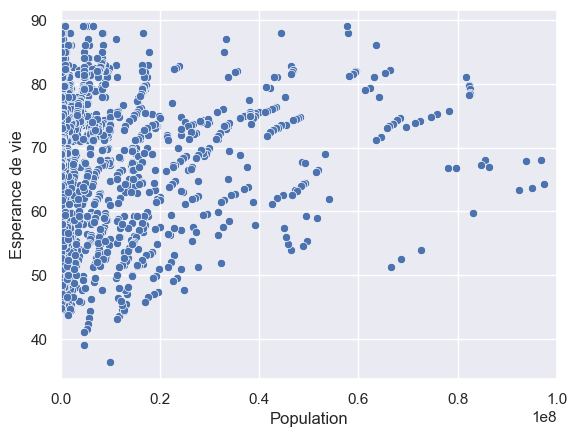

In [4]:
sns.set()
ax = sns.scatterplot(x="Population", y="Life expectancy ", data=esperance)
ax.set(xlabel='Population', ylabel="Esperance de vie")
ax.set_xlim([0, 100000000])
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

##### Visualisez le diagram de dispersion pour démontrer la relation entre l'espérance de vie et la scolarisation.

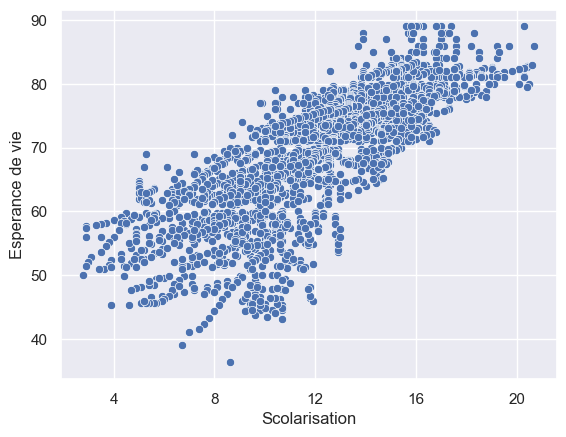

In [5]:
sns.set()
esperance = esperance[esperance['Schooling'] != 0] # supprimer les instances où la scolarisation est égale à 0
esperance = esperance.dropna(subset=['Schooling']) # supprimer les instances où la scolarisation est nulle
esperance = esperance.dropna(subset=['Life expectancy ']) # supprimer les instances où l'esperance de vie est nulle
ax = sns.scatterplot(x="Schooling", y="Life expectancy ", data=esperance)
ax.set(xlabel='Scolarisation', ylabel="Esperance de vie")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

####  Contrairement à la population, nous pouvons voir qu'il existe une relation claire entre la scolarisation et l'espérance de vie.
#### Par conséquent, nous pouvons utiliser la régression linéaire avec la scolarisation comme variable indépendante.

In [6]:
reg_simp = smf.ols('Q("Life expectancy ") ~ Schooling', data=esperance).fit()
reg_simp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.614
Model:                               OLS   Adj. R-squared:                  0.614
Method:                    Least Squares   F-statistic:                     4356.
Date:                   Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:07:55   Log-Likelihood:                -8709.6
No. Observations:                   2742   AIC:                         1.742e+04
Df Residuals:                       2740   BIC:                         1.744e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.2986      0.440     93.843      0.000      40.436      42.162
Schooling      2.3208      0.035     66.004      0.000       2.252       2.390
==============================================================================
Omnibus:                      374.125   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.760
Skew:                          -0.929   Prob(JB):                    4.76e-132
Kurtosis:                       4.356   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
ord_origine = reg_simp.params['Intercept']
coeff = reg_simp.params['Schooling']
print("l'ordonnée à l'origine:", ord_origine)
print("Le coefficient de régression:", coeff)
print(f"La droite y = {coeff}x + {ord_origine}")

l'ordonnée à l'origine: 41.29864088370542
Le coefficient de régression: 2.320753475745285
La droite y = 2.320753475745285x + 41.29864088370542


In [8]:
scholarisation = 18
estimation_vie = coeff*scholarisation + ord_origine
print(f"Espérance de vie avec {scholarisation} ans d'études {estimation_vie}")

Espérance de vie avec 18 ans d'études 83.07220344712054


### On ajoute la droite de régression linéaire au diagramme de dispersion

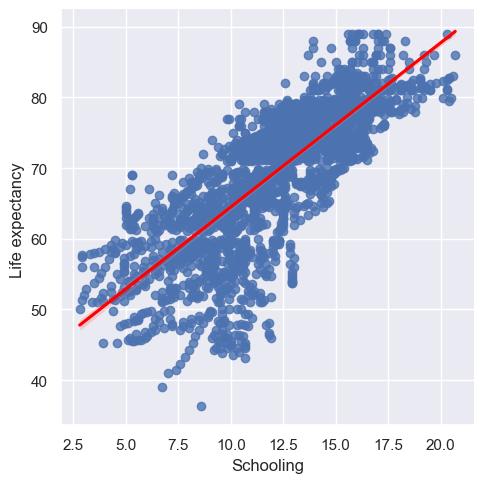

In [9]:
ax = sns.lmplot(x="Schooling", y="Life expectancy ", data=esperance, line_kws={'color':'red'})
ax.set(xlabel='Schooling', ylabel='Life expectancy ')
plt.show()

## Evaluation du modèle

In [10]:
y_pred = reg_simp.predict(esperance['Schooling'])
mae = mean_absolute_error(esperance['Life expectancy '], y_pred)
mse = mean_squared_error(esperance['Life expectancy '], y_pred)
r2 = r2_score(esperance['Life expectancy '], y_pred)
print("Erreur Absolue Moyenne (MAE):", mae)
print("Erreur Quadratic Moyenne (MSE):", mse)
print("Root Mean Squared Error (RMSE):", r2)

Erreur Absolue Moyenne (MAE): 4.3838932327435725
Erreur Quadratic Moyenne (MSE): 33.611742368390374
Root Mean Squared Error (RMSE): 0.6138940888579012


# Regression Lineaire Multiple

##### on prend l'espérance de vie comme variable dépendante et toutes les autres colonnes sauf pays comme variables indépendantes

In [11]:
reg_multi = smf.ols('Q("Life expectancy ") ~ Schooling + Year + Status + Q("Adult Mortality") + Q("infant deaths") + Alcohol + Q("percentage expenditure") + Q("Hepatitis B") + Q("Measles ") + Q(" BMI ") + Q("under-five deaths ") + Polio + Q("Total expenditure") + Q("Diphtheria ") + Q(" HIV/AIDS") + GDP + Population + Q(" thinness  1-19 years") + Q(" thinness 5-9 years") + Q("Income composition of resources") + Schooling', data=esperance).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     422.9
Date:                   Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:07:56   Log-Likelihood:                -4421.2
No. Observations:                   1649   AIC:                             8884.
Df Residuals:                       1628   BIC:                             8998.
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              309.0072     46.210      6.687      0.000     218.369     399.645
Status[T.Developing]                    -0.8865      0.335     -2.644      0.008      -1.544      -0.229
Schooling                                0.8949      0.059     15.142      0.000       0.779       1.011
Year                                    -0.1272      0.023     -5.510      0.000      -0.172      -0.082
Q("Adult Mortality")                    -0.0162      0.001    -17.171      0.000      -0.018      -0.014
Q("infant deaths")                       0.0887      0.011      8.376      0.000       0.068       0.110
Alcohol                                 -0.1313      0.034     -3.901      0.000      -0.197      -0.065
Q("percentage expenditure")              0.0003      0.000      1.691      0.091   -4.83e-05       0.001
Q("Hepatitis B")                        -0.0033      0.004     -0.732      0.464      -0.012       0.005
Q("Measles ")                        -1.033e-05   1.07e-05     -0.966      0.334   -3.13e-05    1.07e-05
Q(" BMI ")                               0.0318      0.006      5.345      0.000       0.020       0.044
Q("under-five deaths ")                 -0.0666      0.008     -8.682      0.000      -0.082      -0.052
Polio                                    0.0058      0.005      1.132      0.258      -0.004       0.016
Q("Total expenditure")                   0.0922      0.040      2.281      0.023       0.013       0.171
Q("Diphtheria ")                         0.0140      0.006      2.387      0.017       0.002       0.026
Q(" HIV/AIDS")                          -0.4481      0.018    -25.174      0.000      -0.483      -0.413
GDP                                   2.451e-05   2.83e-05      0.867      0.386   -3.09e-05    7.99e-05
Population                           -6.085e-10   1.73e-09     -0.351      0.726   -4.01e-09    2.79e-09
Q(" thinness  1-19 years")              -0.0058      0.053     -0.111      0.912      -0.109       0.097
Q(" thinness 5-9 years")                -0.0501      0.052     -0.966      0.334      -0.152       0.052
Q("Income composition of resources")    10.4497      0.833     12.549      0.000       8.816      12.083
==============================================================================
Omnibus:                       31.845   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.052
Skew:                          -0.107   Prob(JB):                     2.48e-13
Kurtosis:                       3.894   Cond. No.                     3.80e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance m

## Retirer les variables non significatives
#### On commence par la moins significative: thinness 1-19 years, car elle a une p-valeur de 0.912

In [12]:
reg_multi = smf.ols('Q("Life expectancy ") ~ Schooling + Year + Status + Q("Adult Mortality") + Q("infant deaths") + Alcohol + Q("percentage expenditure") + Q("Hepatitis B") + Q("Measles ") + Q(" BMI ") + Q("under-five deaths ") + Polio + Q("Total expenditure") + Q("Diphtheria ") + Q(" HIV/AIDS") + GDP + Population + Q(" thinness 5-9 years") + Q("Income composition of resources") + Schooling', data=esperance).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     445.4
Date:                   Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:07:57   Log-Likelihood:                -4421.2
No. Observations:                   1649   AIC:                             8882.
Df Residuals:                       1629   BIC:                             8991.
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              309.1116     46.187      6.693      0.000     218.520     399.703
Status[T.Developing]                    -0.8856      0.335     -2.643      0.008      -1.543      -0.228
Schooling                                0.8953      0.059     15.180      0.000       0.780       1.011
Year                                    -0.1272      0.023     -5.515      0.000      -0.172      -0.082
Q("Adult Mortality")                    -0.0162      0.001    -17.182      0.000      -0.018      -0.014
Q("infant deaths")                       0.0888      0.011      8.383      0.000       0.068       0.110
Alcohol                                 -0.1311      0.034     -3.904      0.000      -0.197      -0.065
Q("percentage expenditure")              0.0003      0.000      1.692      0.091   -4.82e-05       0.001
Q("Hepatitis B")                        -0.0033      0.004     -0.735      0.462      -0.012       0.005
Q("Measles ")                        -1.032e-05   1.07e-05     -0.965      0.335   -3.13e-05    1.07e-05
Q(" BMI ")                               0.0319      0.006      5.359      0.000       0.020       0.044
Q("under-five deaths ")                 -0.0666      0.008     -8.692      0.000      -0.082      -0.052
Polio                                    0.0058      0.005      1.128      0.260      -0.004       0.016
Q("Total expenditure")                   0.0922      0.040      2.281      0.023       0.013       0.171
Q("Diphtheria ")                         0.0140      0.006      2.392      0.017       0.003       0.026
Q(" HIV/AIDS")                          -0.4481      0.018    -25.187      0.000      -0.483      -0.413
GDP                                    2.45e-05   2.83e-05      0.867      0.386   -3.09e-05    7.99e-05
Population                           -6.141e-10   1.73e-09     -0.355      0.723   -4.01e-09    2.78e-09
Q(" thinness 5-9 years")                -0.0550      0.026     -2.078      0.038      -0.107      -0.003
Q("Income composition of resources")    10.4533      0.832     12.567      0.000       8.822      12.085
==============================================================================
Omnibus:                       31.915   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.221
Skew:                          -0.107   Prob(JB):                     2.28e-13
Kurtosis:                       3.895   Cond. No.                     3.80e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+10. This might indica

#### On retire apres: Population, car elle a une p-valeur de 0.723

In [13]:
reg_multi = smf.ols('Q("Life expectancy ") ~ Schooling + Year + Status + Q("Adult Mortality") + Q("infant deaths") + Alcohol + Q("percentage expenditure") + Q("Hepatitis B") + Q("Measles ") + Q(" BMI ") + Q("under-five deaths ") + Polio + Q("Total expenditure") + Q("Diphtheria ") + Q(" HIV/AIDS") + GDP + Q(" thinness 5-9 years") + Q("Income composition of resources") + Schooling', data=esperance).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     526.8
Date:                   Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:07:57   Log-Likelihood:                -4919.1
No. Observations:                   1848   AIC:                             9876.
Df Residuals:                       1829   BIC:                             9981.
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              288.9160     41.798      6.912      0.000     206.940     370.892
Status[T.Developing]                    -1.0484      0.304     -3.451      0.001      -1.644      -0.453
Schooling                                0.9427      0.052     18.104      0.000       0.841       1.045
Year                                    -0.1167      0.021     -5.588      0.000      -0.158      -0.076
Q("Adult Mortality")                    -0.0166      0.001    -18.326      0.000      -0.018      -0.015
Q("infant deaths")                       0.0929      0.010      9.340      0.000       0.073       0.112
Alcohol                                 -0.0954      0.029     -3.238      0.001      -0.153      -0.038
Q("percentage expenditure")              0.0003      0.000      2.579      0.010    7.23e-05       0.001
Q("Hepatitis B")                        -0.0026      0.004     -0.615      0.539      -0.011       0.006
Q("Measles ")                        -1.299e-05   1.04e-05     -1.246      0.213   -3.34e-05    7.45e-06
Q(" BMI ")                               0.0231      0.005      4.313      0.000       0.013       0.034
Q("under-five deaths ")                 -0.0697      0.007     -9.538      0.000      -0.084      -0.055
Polio                                    0.0065      0.005      1.316      0.188      -0.003       0.016
Q("Total expenditure")                   0.0910      0.038      2.415      0.016       0.017       0.165
Q("Diphtheria ")                         0.0156      0.006      2.828      0.005       0.005       0.026
Q(" HIV/AIDS")                          -0.4532      0.017    -26.174      0.000      -0.487      -0.419
GDP                                   2.081e-05    1.6e-05      1.301      0.194   -1.06e-05    5.22e-05
Q(" thinness 5-9 years")                -0.0814      0.025     -3.206      0.001      -0.131      -0.032
Q("Income composition of resources")     8.4856      0.690     12.306      0.000       7.133       9.838
==============================================================================
Omnibus:                       46.812   Durbin-Watson:                   0.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.430
Skew:                          -0.135   Prob(JB):                     3.12e-21
Kurtosis:                       4.074   Cond. No.                     7.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### On retire apres: Hepatitis B, car elle a une p-valeur de 0.767

In [14]:
reg_multi = smf.ols('Q("Life expectancy ") ~ Schooling + Year + Status + Q("Adult Mortality") + Q("infant deaths") + Alcohol + Q("percentage expenditure") + Q("Measles ") + Q(" BMI ") + Q("under-five deaths ") + Polio + Q("Total expenditure") + Q("Diphtheria ") + Q(" HIV/AIDS") + GDP + Q(" thinness 5-9 years") + Q("Income composition of resources") + Schooling', data=esperance).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.855
Model:                               OLS   Adj. R-squared:                  0.854
Method:                    Least Squares   F-statistic:                     788.9
Date:                   Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:07:57   Log-Likelihood:                -6250.2
No. Observations:                   2292   AIC:                         1.254e+04
Df Residuals:                       2274   BIC:                         1.264e+04
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              189.3025     38.604      4.904      0.000     113.600     265.005
Status[T.Developing]                    -1.2337      0.283     -4.366      0.000      -1.788      -0.680
Schooling                                1.0907      0.047     23.051      0.000       0.998       1.183
Year                                    -0.0686      0.019     -3.554      0.000      -0.106      -0.031
Q("Adult Mortality")                    -0.0146      0.001    -17.951      0.000      -0.016      -0.013
Q("infant deaths")                       0.0810      0.008     10.061      0.000       0.065       0.097
Alcohol                                 -0.1439      0.028     -5.147      0.000      -0.199      -0.089
Q("percentage expenditure")              0.0002   9.55e-05      2.071      0.038    1.05e-05       0.000
Q("Measles ")                         -5.11e-06   8.16e-06     -0.626      0.531   -2.11e-05    1.09e-05
Q(" BMI ")                               0.0308      0.005      5.781      0.000       0.020       0.041
Q("under-five deaths ")                 -0.0600      0.006    -10.071      0.000      -0.072      -0.048
Polio                                    0.0146      0.005      3.098      0.002       0.005       0.024
Q("Total expenditure")                   0.0289      0.036      0.811      0.418      -0.041       0.099
Q("Diphtheria ")                         0.0229      0.005      4.845      0.000       0.014       0.032
Q(" HIV/AIDS")                          -0.4776      0.017    -28.495      0.000      -0.511      -0.445
GDP                                   1.618e-05   1.46e-05      1.108      0.268   -1.24e-05    4.48e-05
Q(" thinness 5-9 years")                -0.0590      0.024     -2.453      0.014      -0.106      -0.012
Q("Income composition of resources")     8.0552      0.641     12.559      0.000       6.797       9.313
==============================================================================
Omnibus:                      105.745   Durbin-Watson:                   0.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.884
Skew:                          -0.281   Prob(JB):                     2.21e-52
Kurtosis:                       4.475   Cond. No.                     8.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### On retire apres: Total expenditure, car elle a une p-valeur de 0.607

In [15]:
reg_multi = smf.ols('Q("Life expectancy ") ~ Schooling + Year + Status + Q("Adult Mortality") + Q("infant deaths") + Alcohol + Q("percentage expenditure") + Q("Measles ") + Q(" BMI ") + Q("under-five deaths ") + Polio + Q("Diphtheria ") + Q(" HIV/AIDS") + GDP + Q(" thinness 5-9 years") + Q("Income composition of resources") + Schooling', data=esperance).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.855
Model:                               OLS   Adj. R-squared:                  0.854
Method:                    Least Squares   F-statistic:                     841.2
Date:                   Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:07:57   Log-Likelihood:                -6257.7
No. Observations:                   2295   AIC:                         1.255e+04
Df Residuals:                       2278   BIC:                         1.265e+04
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              186.2443     38.379      4.853      0.000     110.983     261.505
Status[T.Developing]                    -1.2644      0.280     -4.512      0.000      -1.814      -0.715
Schooling                                1.0933      0.047     23.202      0.000       1.001       1.186
Year                                    -0.0670      0.019     -3.492      0.000      -0.105      -0.029
Q("Adult Mortality")                    -0.0146      0.001    -17.971      0.000      -0.016      -0.013
Q("infant deaths")                       0.0810      0.008     10.068      0.000       0.065       0.097
Alcohol                                 -0.1421      0.028     -5.123      0.000      -0.197      -0.088
Q("percentage expenditure")              0.0002   9.23e-05      2.128      0.033    1.54e-05       0.000
Q("Measles ")                        -5.336e-06   8.16e-06     -0.654      0.513   -2.13e-05    1.07e-05
Q(" BMI ")                               0.0308      0.005      5.782      0.000       0.020       0.041
Q("under-five deaths ")                 -0.0600      0.006    -10.077      0.000      -0.072      -0.048
Polio                                    0.0146      0.005      3.104      0.002       0.005       0.024
Q("Diphtheria ")                         0.0230      0.005      4.873      0.000       0.014       0.032
Q(" HIV/AIDS")                          -0.4763      0.017    -28.559      0.000      -0.509      -0.444
GDP                                   1.662e-05   1.41e-05      1.176      0.240   -1.11e-05    4.43e-05
Q(" thinness 5-9 years")                -0.0614      0.024     -2.567      0.010      -0.108      -0.014
Q("Income composition of resources")     8.0060      0.638     12.545      0.000       6.754       9.257
==============================================================================
Omnibus:                      101.571   Durbin-Watson:                   0.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.401
Skew:                          -0.274   Prob(JB):                     1.87e-49
Kurtosis:                       4.431   Cond. No.                     8.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### On retire apres: Measles, car elle a une p-valeur de 0.300

In [16]:
reg_multi = smf.ols('Q("Life expectancy ") ~ Schooling + Year + Status + Q("Adult Mortality") + Q("infant deaths") + Alcohol + Q("percentage expenditure") + Q(" BMI ") + Q("under-five deaths ") + Polio + Q("Diphtheria ") + Q(" HIV/AIDS") + GDP + Q(" thinness 5-9 years") + Q("Income composition of resources") + Schooling', data=esperance).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.855
Model:                               OLS   Adj. R-squared:                  0.854
Method:                    Least Squares   F-statistic:                     897.5
Date:                   Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:07:57   Log-Likelihood:                -6257.9
No. Observations:                   2295   AIC:                         1.255e+04
Df Residuals:                       2279   BIC:                         1.264e+04
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              184.5378     38.285      4.820      0.000     109.460     259.615
Status[T.Developing]                    -1.2710      0.280     -4.539      0.000      -1.820      -0.722
Schooling                                1.0935      0.047     23.211      0.000       1.001       1.186
Year                                    -0.0662      0.019     -3.457      0.001      -0.104      -0.029
Q("Adult Mortality")                    -0.0146      0.001    -17.986      0.000      -0.016      -0.013
Q("infant deaths")                       0.0815      0.008     10.170      0.000       0.066       0.097
Alcohol                                 -0.1429      0.028     -5.153      0.000      -0.197      -0.089
Q("percentage expenditure")              0.0002   9.23e-05      2.132      0.033    1.57e-05       0.000
Q(" BMI ")                               0.0310      0.005      5.841      0.000       0.021       0.041
Q("under-five deaths ")                 -0.0606      0.006    -10.263      0.000      -0.072      -0.049
Polio                                    0.0146      0.005      3.107      0.002       0.005       0.024
Q("Diphtheria ")                         0.0229      0.005      4.867      0.000       0.014       0.032
Q(" HIV/AIDS")                          -0.4766      0.017    -28.590      0.000      -0.509      -0.444
GDP                                   1.658e-05   1.41e-05      1.174      0.241   -1.11e-05    4.43e-05
Q(" thinness 5-9 years")                -0.0604      0.024     -2.530      0.011      -0.107      -0.014
Q("Income composition of resources")     8.0203      0.638     12.576      0.000       6.770       9.271
==============================================================================
Omnibus:                      100.395   Durbin-Watson:                   0.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.396
Skew:                          -0.269   Prob(JB):                     5.10e-49
Kurtosis:                       4.427   Cond. No.                     8.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### On retire apres: percentage expenditure, car elle a une p-valeur de 0.101

In [17]:
reg_multi = smf.ols('Q("Life expectancy ") ~ Schooling + Year + Status + Q("Adult Mortality") + Q("infant deaths") + Alcohol + Q(" BMI ") + Q("under-five deaths ") + Polio + Q("Diphtheria ") + Q(" HIV/AIDS") + GDP + Q(" thinness 5-9 years") + Q("Income composition of resources") + Schooling', data=esperance).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.855
Model:                               OLS   Adj. R-squared:                  0.854
Method:                    Least Squares   F-statistic:                     959.8
Date:                   Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:07:57   Log-Likelihood:                -6260.2
No. Observations:                   2295   AIC:                         1.255e+04
Df Residuals:                       2280   BIC:                         1.264e+04
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              185.8583     38.310      4.851      0.000     110.732     260.984
Status[T.Developing]                    -1.3463      0.278     -4.843      0.000      -1.891      -0.801
Schooling                                1.0939      0.047     23.201      0.000       1.001       1.186
Year                                    -0.0668      0.019     -3.486      0.001      -0.104      -0.029
Q("Adult Mortality")                    -0.0146      0.001    -17.952      0.000      -0.016      -0.013
Q("infant deaths")                       0.0820      0.008     10.235      0.000       0.066       0.098
Alcohol                                 -0.1376      0.028     -4.978      0.000      -0.192      -0.083
Q(" BMI ")                               0.0306      0.005      5.772      0.000       0.020       0.041
Q("under-five deaths ")                 -0.0609      0.006    -10.325      0.000      -0.073      -0.049
Polio                                    0.0142      0.005      3.013      0.003       0.005       0.023
Q("Diphtheria ")                         0.0228      0.005      4.841      0.000       0.014       0.032
Q(" HIV/AIDS")                          -0.4766      0.017    -28.567      0.000      -0.509      -0.444
GDP                                   4.338e-05   6.45e-06      6.727      0.000    3.07e-05     5.6e-05
Q(" thinness 5-9 years")                -0.0617      0.024     -2.583      0.010      -0.108      -0.015
Q("Income composition of resources")     7.9294      0.637     12.452      0.000       6.681       9.178
==============================================================================
Omnibus:                       98.708   Durbin-Watson:                   0.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.847
Skew:                          -0.265   Prob(JB):                     4.96e-48
Kurtosis:                       4.413   Cond. No.                     8.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### On retire apres: Alcohol, car elle a une p-valeur de 0.020

In [18]:
reg_multi = smf.ols('Q("Life expectancy ") ~ Schooling + Year + Status + Q("Adult Mortality") + Q("infant deaths") + Q(" BMI ") + Q("under-five deaths ") + Polio + Q("Diphtheria ") + Q(" HIV/AIDS") + GDP + Q(" thinness 5-9 years") + Q("Income composition of resources") + Schooling', data=esperance).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.854
Model:                               OLS   Adj. R-squared:                  0.853
Method:                    Least Squares   F-statistic:                     1090.
Date:                   Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:07:58   Log-Likelihood:                -6649.8
No. Observations:                   2441   AIC:                         1.333e+04
Df Residuals:                       2427   BIC:                         1.341e+04
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              142.9531     34.375      4.159      0.000      75.545     210.361
Status[T.Developing]                    -0.8633      0.249     -3.462      0.001      -1.352      -0.374
Schooling                                1.0085      0.044     22.996      0.000       0.923       1.094
Year                                    -0.0454      0.017     -2.640      0.008      -0.079      -0.012
Q("Adult Mortality")                    -0.0156      0.001    -19.795      0.000      -0.017      -0.014
Q("infant deaths")                       0.0851      0.008     11.187      0.000       0.070       0.100
Q(" BMI ")                               0.0281      0.005      5.523      0.000       0.018       0.038
Q("under-five deaths ")                 -0.0636      0.006    -11.353      0.000      -0.075      -0.053
Polio                                    0.0163      0.005      3.625      0.000       0.007       0.025
Q("Diphtheria ")                         0.0221      0.005      4.868      0.000       0.013       0.031
Q(" HIV/AIDS")                          -0.4783      0.017    -28.980      0.000      -0.511      -0.446
GDP                                   4.098e-05   6.28e-06      6.530      0.000    2.87e-05    5.33e-05
Q(" thinness 5-9 years")                -0.0507      0.023     -2.220      0.027      -0.095      -0.006
Q("Income composition of resources")     8.1450      0.630     12.926      0.000       6.909       9.381
==============================================================================
Omnibus:                      116.608   Durbin-Watson:                   0.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.607
Skew:                          -0.294   Prob(JB):                     9.46e-58
Kurtosis:                       4.495   Cond. No.                     7.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### On retire apres: Year, car elle a une p-valeur de 0.010

In [19]:
reg_multi = smf.ols('Q("Life expectancy ") ~ Schooling + Status + Q("Adult Mortality") + Q("infant deaths") + Q(" BMI ") + Q("under-five deaths ") + Polio + Q("Diphtheria ") + Q(" HIV/AIDS") + GDP + Q(" thinness 5-9 years") + Q("Income composition of resources") + Schooling', data=esperance).fit()
reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.853
Model:                               OLS   Adj. R-squared:                  0.853
Method:                    Least Squares   F-statistic:                     1177.
Date:                   Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                           15:07:58   Log-Likelihood:                -6653.3
No. Observations:                   2441   AIC:                         1.333e+04
Df Residuals:                       2428   BIC:                         1.341e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               52.2324      0.615     84.893      0.000      51.026      53.439
Status[T.Developing]                    -0.9613      0.247     -3.894      0.000      -1.445      -0.477
Schooling                                0.9969      0.044     22.819      0.000       0.911       1.083
Q("Adult Mortality")                    -0.0158      0.001    -20.070      0.000      -0.017      -0.014
Q("infant deaths")                       0.0855      0.008     11.224      0.000       0.071       0.100
Q(" BMI ")                               0.0287      0.005      5.633      0.000       0.019       0.039
Q("under-five deaths ")                 -0.0638      0.006    -11.384      0.000      -0.075      -0.053
Polio                                    0.0169      0.005      3.750      0.000       0.008       0.026
Q("Diphtheria ")                         0.0214      0.005      4.722      0.000       0.013       0.030
Q(" HIV/AIDS")                          -0.4726      0.016    -28.847      0.000      -0.505      -0.441
GDP                                   4.024e-05   6.28e-06      6.410      0.000    2.79e-05    5.26e-05
Q(" thinness 5-9 years")                -0.0532      0.023     -2.329      0.020      -0.098      -0.008
Q("Income composition of resources")     7.9385      0.626     12.681      0.000       6.711       9.166
==============================================================================
Omnibus:                      115.866   Durbin-Watson:                   0.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.385
Skew:                          -0.295   Prob(JB):                     7.81e-57
Kurtosis:                       4.481   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### La p-valeur de toutes les variables est inférieure à 0,05, elles sont donc significatives. R² = 0.842


##### on peut prédire l'espérance de vie en donnant des valeurs à chacune des variables dépendantes.

In [20]:
a_prevoir = pd.DataFrame({'Status': 'Developed', 
                            'Schooling': 18, 
                          'Adult Mortality': 15, 
                          'infant deaths': 1, 
                          ' BMI ': 55.79,
                         'under-five deaths ': 1,
                         'Polio': 121,
                         'Diphtheria ': 137,
                          ' HIV/AIDS': 0.2,
                          'GDP': 42311,
                          ' thinness 5-9 years': 2.1,
                          'Income composition of resources': 0.831
                         }, index=[0])
esperance_prev = reg_multi.predict(a_prevoir)
round(esperance_prev[0], 2)

84.63

# Regression Lineaire Multiple Avec ACP

#### - ACP (Analyse en Composantes Principales) est une technique d'analyse de données qui permet de réduire la dimensionnalité d'un ensemble de données tout en conservant le maximum d'informations possible. 
#### - on va utiliser cette méthode pour réduire la dimensionnalité de notre ensemble de données, puis appliquer la régression linéaire sur le résultat de cette méthode. Nous allons ensuite comparer les résultats de la régression linéaire avec et sans l'utilisation de l'ACP. 

## Dans cet exemple on va utiliser la régression linéaire a l'aide de bibliothèque sickit-learn

## Importation des bibliothèques

#### Les bibliothèques 'LinearRegression', 'StandardScaler' et 'SimpleImputer' sont importées depuis sklearn.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [22]:
# identifier les colonnes qui contiennent des données catégoriques
print(esperance.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [23]:
categorical_columns = ['Status']

# identifier les colonnes qui contiennent des données catégoriques
encoder = OneHotEncoder()

# adapter et transformer les colonnes catégorielles en utilisant OneHotEncoder
encoded_data = pd.DataFrame(encoder.fit_transform(esperance[categorical_columns]).toarray())

# renommer les colonnes des données encodées avec les noms de colonnes originaux
encoded_data.columns = encoder.get_feature_names_out(input_features=categorical_columns)

# concaténer les données encodées avec les données originales, en laissant tomber les colonnes 
# catégorielles originales.
esperance = pd.concat([esperance.drop(categorical_columns, axis=1), encoded_data], axis=1)

esperance.sample(10)

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
1031,Greece,2010.0,83.0,76.0,0.0,9.00,3189.754439,95.0,149.0,63.7,...,99.0,0.1,26917.758980,11121341.0,0.8,0.7,0.859,16.4,0.0,1.0
1393,Kiribati,2000.0,64.1,222.0,0.0,0.46,11.075433,9.0,0.0,67.9,...,9.0,0.1,796.793763,8446.0,0.2,0.2,0.000,10.0,0.0,1.0
2352,Slovenia,2008.0,78.9,96.0,0.0,10.94,392.958854,NaN,0.0,55.8,...,97.0,0.1,2751.812700,221316.0,1.7,1.7,0.869,16.9,0.0,1.0
2727,Uganda,2002.0,48.8,523.0,112.0,10.42,2.690898,29.0,49871.0,13.6,...,57.0,10.0,24.242323,2571848.0,6.8,6.8,0.404,11.0,0.0,1.0
156,Azerbaijan,2003.0,67.8,154.0,7.0,0.55,42.414912,51.0,1978.0,43.6,...,77.0,0.1,883.643996,82341.0,3.0,3.0,0.659,10.8,0.0,1.0
2237,Saudi Arabia,2011.0,73.9,92.0,8.0,0.09,173.575559,98.0,362.0,64.7,...,98.0,0.1,2377.747390,NaN,7.4,7.4,0.804,13.9,1.0,0.0
2631,Togo,2001.0,54.6,345.0,14.0,0.95,2.048575,NaN,1833.0,17.1,...,5.0,5.3,26.639465,511177.0,9.2,9.1,0.426,9.4,0.0,1.0
2493,Swaziland,2011.0,55.0,438.0,2.0,5.20,735.709098,91.0,0.0,3.2,...,91.0,15.7,3934.273250,1225258.0,5.1,5.2,0.526,11.2,0.0,1.0
1407,Kuwait,2002.0,73.3,94.0,0.0,0.01,1209.680547,99.0,0.0,65.0,...,99.0,0.1,17789.419810,NaN,3.2,3.0,0.785,13.9,0.0,1.0
2005,Paraguay,2001.0,71.2,17.0,4.0,6.66,233.848860,NaN,0.0,39.8,...,89.0,0.1,1417.265820,546624.0,2.5,2.4,0.624,11.8,1.0,0.0


## Création des ensembles de données d'entrainement et de test

#### Les données sont divisées en ensembles d'entraînement et de test en utilisant la fonction 'train_test_split' de la bibliothèque sklearn. 

In [24]:
# on va utiliser la fonction dropna pour supprimer les observations contenant la valeur NaN, qui signifie
# Not a Number, Nan peut être le résultat d'une erreur de calcul, par exemple la division d'un nombre sur 0
esperance = esperance.dropna() 

X = esperance.drop(['Country', 'Life expectancy '], axis=1)

y = esperance['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Imputation des valeurs manquantes

#### La classe 'SimpleImputer' est utilisée pour remplacer les valeurs manquantes des données d'entrée par la moyenne des valeurs existantes. Les valeurs manquantes peuvent affecter négativement la qualité de la régression linéaire, donc il est important de remplacer ces valeurs manquantes avant de poursuivre.

In [25]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

## Standardisation des données

#### La classe 'StandardScaler' est utilisée pour mettre à l'échelle les données d'entrée en les centrant autour de zéro et en les mettant à l'échelle en fonction de l'écart type. Cela permet de normaliser les données d'entrée pour une meilleure performance de la régression linéaire.

In [26]:
scaler = StandardScaler()
X_train_standardise = scaler.fit_transform(X_train_imputed)

### sélectionner le nombre minimum de composantes principales nécessaires pour conserver 90% de la variance totale des données.

#### L'ACP permet de réduire la dimension des données en identifiant les composantes principales qui expliquent la plupart de la variance dans les données. Nous spécifions également que nous souhaitons que 90% de la variance totale soit expliquée par les composantes principales sélectionnées.

In [27]:
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_standardise)

## Affichage du nombre de composantes principales

#### Le nombre de composantes principales qui expliquent 90% de la variance totale est affiché à l'aide de la méthode 'n_components_' de l'objet PCA. Cela nous donne une idée du nombre de variables nécessaires pour expliquer la variance des données d'entrée.

In [28]:
print('Le nombre de composantes principales nécessaires pour préserver 90 % de la variance est :', pca.n_components_)

Le nombre de composantes principales nécessaires pour préserver 90 % de la variance est : 12


#### Un autre methode pour trouver le nombre optimale de composant principale est d'utiliser la bibliothèque Matplotlib pour tracer un graphique montrant la variance cumulée expliquée par rapport au nombre de composantes principales. Cela permet de déterminer le nombre optimal de composantes principales à utiliser pour réduire la dimensionnalité des données tout en conservant le maximum d'informations possibles.

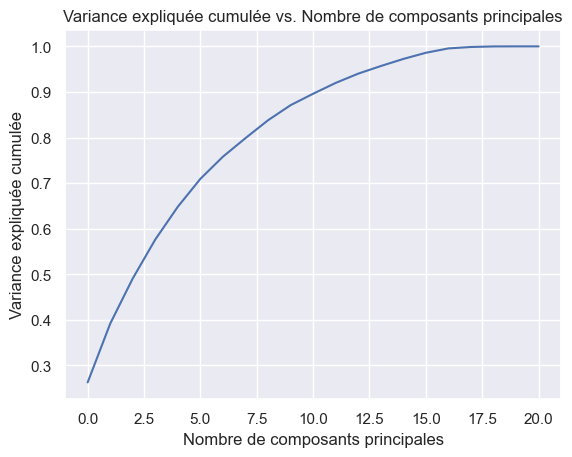

In [29]:
# Ajustement de l'ACP aux données standardisées
pca = PCA().fit(X_train_standardise)

# Tracez le graphe du rapport cumulé de la variance expliquée
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composants principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée vs. Nombre de composants principales')
plt.show()

## Appliquer PCA avec 11 composants

#### La première partie du code applique l'analyse en composantes principales (PCA) au jeu de données d'entraînement. PCA est utilisée pour réduire la dimensionnalité du jeu de données en transformant les variables en une combinaison de nouvelles variables appelées composantes principales. La fonction PCA() prend en argument le nombre de composantes principales souhaitées, ici 11. La méthode fit_transform() est utilisée pour calculer les composantes principales et transformer les données d'entraînement en utilisant les nouvelles composantes principales.

In [30]:
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_standardise)

## Transformer l'ensemble de test en utilisant le même objet PCA

#### On va transformer l'ensemble de test en utilisant le même objet PCA que celui utilisé pour l'ensemble d'entraînement. Les données d'ensemble de test sont également nettoyées en utilisant la méthode SimpleImputer() et normalisées en utilisant la méthode StandardScaler(). Enfin, la méthode transform() est utilisée pour transformer les données de test en utilisant les mêmes composantes principales calculées à partir de l'ensemble d'entraînement.

In [31]:
X_test_imputed = imputer.transform(X_test)
X_test_standardise = scaler.transform(X_test_imputed)
X_test_pca = pca.transform(X_test_standardise)

## Entraîner le modèle de régression linéaire sur l'ensemble d'entraînement transformé par PCA

#### ici on va utiliser la méthode LinearRegression() de Scikit-learn pour entraîner un modèle de régression linéaire sur les données d'entraînement transformées par PCA. Les données d'entrée sont les composantes principales transformées et la variable cible y_train.

In [32]:
reg = LinearRegression()
reg.fit(X_train_pca, y_train)

LinearRegression()

## Évaluation du modèle sur l'ensemble de test transformé par PCA

#### Dernièrement on va utiliser le modèle de régression linéaire entraîné pour prédire la variable a expliqué Y pour l'ensemble de test transformé par PCA. Les prévisions sont ensuite comparées aux valeurs réelles de la variable cible en utilisant les méthodes mean_squared_error() et r2_score() pour calculer les métriques de performance du modèle, à savoir le MSE et le R^2.

In [33]:
y_pred = reg.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {round(mse, 2)}')
print(f'R^2: {round(r2*100, 2)}%')

MSE: 14.04
R^2: 81.81%


# Conclusion

#### la régression linéaire sur les variables significatives a donné une meilleure performance (R² = 0,85) que la ACP suivie d'un modèle de régression linéaire (R² = 0,81) avec 11 composantes principales. Cela suggère que les variables significatives ont une plus grande influence sur la variable a expliqué Y que les autres variables, et que la ACP peut ne pas avoir capturé toutes les informations importantes. Toutefois, la ACP peut être utile pour réduire la complexité de l'ensemble de données, améliorer l'interprétabilité des relations entre les variables et éviter le surajustement dans les ensembles de données plus grands avec un grand nombre de variables.

#### l'ACP peut être un outil précieux pour gérer des ensembles de données complexes tels que ceux comportant un grand nombre de variables.

####  on donne par exemple le cas d'un ensemble de données comportant un grand nombre de variables tel que 2000, l'utilisation de l'analyse en composantes principales (ACP) peut être particulièrement utile, en réduisant le nombre de variables de l'ensemble de données, l'ACP permet de réduire la complexité du modèle et d'améliorer ses performances.